<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#linear regression using the python class

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from  sklearn.metrics import r2_score


In [2]:
df = pd.read_csv("audi.csv")
df.isnull().sum().sum() # no  null value

x = df.drop("price",axis=1)
y = df["price"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


c = ColumnTransformer(transformers = [
    ("cat" , OneHotEncoder(handle_unknown='ignore' , sparse_output=False , drop='first') , ['model' ,'transmission', 'fuelType']),
    ("num" , StandardScaler() , ['year' , 'mileage' , 'mpg' , 'engineSize', 'tax'])
] ,
                      remainder = "passthrough")


x_train = c.fit_transform(x_train)
x_test = c.transform(x_test)

#python class using the OLS method

In [3]:
import numpy as np

class LinearRegressionOLS:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)
        self.X_test = np.array(X_test)
        self.y_test = np.array(y_test)
        self.m = None
        self.c = None

    def train(self):

        X_b = np.c_[np.ones((self.X_train.shape[0], 1)), self.X_train]
        theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ self.y_train
        self.c = theta[0]  # Intercept
        self.m = theta[1:]  # Slope

        print(f"Model trained: m = {self.m}, c = {self.c}")

    def predict(self, X):
        X = np.array(X)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b @ np.r_[self.c, self.m]

    def evaluate(self):
        y_pred = self.predict(self.X_test)
        mse = np.mean((self.y_test - y_pred) ** 2)
        ss_total = np.sum((self.y_test - np.mean(self.y_test)) ** 2)
        ss_residual = np.sum((self.y_test - y_pred) ** 2)
        r2_score = 1 - (ss_residual / ss_total)
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared (R²): {r2_score}")
        print(f"The accuracy of the model on this data set is  {r2_score*100}%")





* Object creation and model prediction

In [4]:
model = LinearRegressionOLS(x_train, y_train, x_test, y_test)
model.train()
model.evaluate()


Model trained: m = [19200.52139746  1346.60590666  1656.82536977  2987.18121096
  3667.75883172  4409.29425494  8055.53501955  1563.22534316
  2967.68220871  6864.55298012 15161.56141229 25557.88995086
 61490.04044442  9776.61296519 20288.79481305 19661.17011653
 27744.57214814 19087.25696615  5518.99813319 12296.39707746
   601.82436618  2316.22642623 11532.5627362  20043.21896381
  3338.1852285  -1415.16839481   156.29050031 33453.10808628
  -846.11373494  3951.68557799 -1849.85356233 -3799.53091196
  2754.58084825 -2007.10143185], c = 20248.69785280897
Mean Squared Error: 15208450.157298148
R-squared (R²): 0.8893254875292684
The accuracy of the model on this data set is  88.93254875292685%


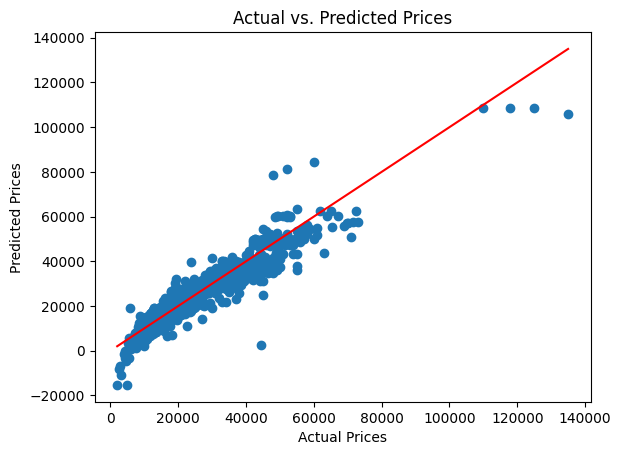

In [5]:

import matplotlib.pyplot as plt
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()


# Explanation of the Code
This code builds a Linear Regression model using Ordinary Least Squares (OLS) method. It is written in Object-Oriented Programming (OOP) style, making it easy to reuse and modify.

1. Class Initialization (__init__ method)
The LinearRegressionOLS class is created to handle training, prediction, and evaluation.
It takes training data (X_train, y_train) and test data (X_test, y_test) when creating an object.
It initializes m (slope) and c (intercept), which will be calculated later.
2. Training the Model (train method)
This method finds the best m (slope) and c (intercept) using a mathematical formula.
The formula ensures the best fit line for the given data.
After training, the values of m and c are printed.
3. Making Predictions (predict method)
This method takes new input values and predicts results using the formula:

𝑦
=
𝑚
𝑋
+
𝑐
y=mX+c
It returns the predicted values.

4. Evaluating the Model (evaluate method)
Checks how well the model performs using two metrics:
Mean Squared Error (MSE): Measures the difference between predicted and actual values. Lower is better.
R-squared (R²) Score: Tells how well the model explains the data. Closer to 1 means a better fit.
5. Plotting the Regression Line (plot_regression_line method)
This method draws a scatter plot of actual data points.
It also draws the best-fit line based on the calculated m and c.
Uses matplotlib to visualize the results.
6. How to Use It
Create an object of the class using training and test data.
Call the train() method to calculate m and c.
Call the evaluate() method to check model performance.
Call plot_regression_line() to see the best-fit line.


In [6]:
class Myclass:

    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)

        # calcuate the coeffs
        betas = np.linalg.inv(np.dot(X_train.T,X_train)).dot(X_train.T).dot(y_train)
        self.intercept_ = betas[0]
        self.coef_ = betas[1:]

    def predict(self,X_test):
        y_pred = np.dot(X_test,self.coef_) + self.intercept_
        return y_pred


In [12]:
lr = Myclass()
lr.fit(x_train,y_train)

In [14]:
lr.coef_

array([19200.52139746,  1346.60590666,  1656.82536977,  2987.18121096,
        3667.75883172,  4409.29425494,  8055.53501955,  1563.22534316,
        2967.68220871,  6864.55298012, 15161.56141229, 25557.88995086,
       61490.04044442,  9776.61296519, 20288.79481305, 19661.17011653,
       27744.57214814, 19087.25696615,  5518.99813319, 12296.39707746,
         601.82436618,  2316.22642623, 11532.5627362 , 20043.21896381,
        3338.1852285 , -1415.16839481,   156.29050031, 33453.10808628,
        -846.11373494,  3951.68557799, -1849.85356233, -3799.53091196,
        2754.58084825, -2007.10143185])

In [15]:
y_pred = lr.predict(x_test)

In [17]:
print(f"the accuracy of the model is {r2_score(y_test,y_pred)}")

the accuracy of the model is 0.8893254875292684


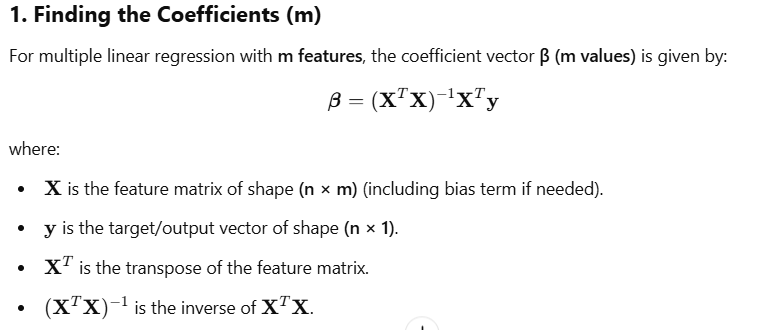

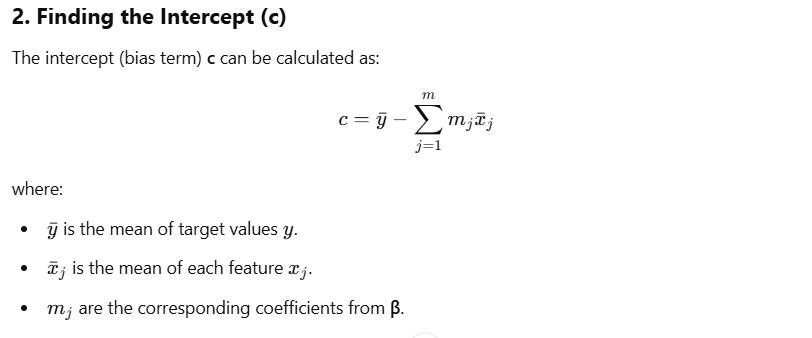